# **Project Name**    - Yes bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

This project aims to predict the closing price of Yes Bank stocks using machine learning to assist investors in making informed decisions.

Steps Involved:

Data Collection: Historical stock data from platforms like Yahoo Finance, including features such as Open, High, Low, Close, Volume, and technical indicators.

Data Preprocessing: Cleaning missing values, removing outliers, normalizing data, and engineering features like moving averages and RSI.

Exploratory Data Analysis (EDA): Visualizing trends and identifying patterns using line plots, histograms, and heatmaps.

Model Development: Using algorithms like Random Forest, XGBoost, and LSTM for sequential data modeling. Evaluating with metrics like MAE and RMSE.

Insights: Significant features include recent prices and moving averages; the model aligns well with actual trends.

Future enhancements involve integrating real-time data and sentiment analysis for more accurate predictions. This system provides a robust tool for financial decision-making.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Predicting stock prices is a complex yet essential task for investors and analysts who aim to navigate the financial markets effectively. With the unpredictable nature of market movements, having a reliable tool to forecast stock prices can make a significant difference in decision-making.

This project focuses on predicting the closing prices of Yes Bank stocks using historical data and machine learning. By analyzing patterns, trends, and key factors influencing stock price movements, we aim to develop a model that offers accurate and actionable insights.

The main challenges include dealing with data irregularities like missing values and outliers, identifying the most relevant factors that influence price trends, and choosing a model capable of capturing these patterns effectively.

With this system, we strive to empower users—whether they’re investors, traders, or analysts—with a data-driven approach to make informed financial decisions confidently.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [35]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [36]:
# Load Dataset
dataset = pd.read_csv("data_YesBank_StockPrices.csv")

### Dataset First View

In [37]:
# Dataset First Look
dataset

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [38]:
# Dataset Rows & Columns count
dataset.shape  #(rows,columns)

(185, 5)

### Dataset Information

In [39]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [40]:
# Dataset Duplicate Value Count
print(dataset.duplicated().sum())   # That means no duplicate values

0


#### Missing Values/Null Values

In [41]:
# Missing Values/Null Values Count
dataset.isnull().value_counts()

Date   Open   High   Low    Close
False  False  False  False  False    185
Name: count, dtype: int64

In [42]:
dataset.isnull().sum()  # No missing values

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

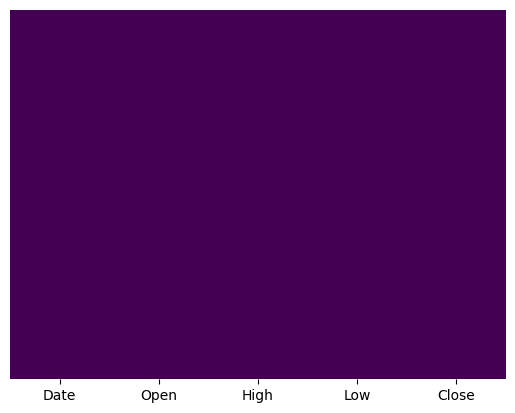

In [43]:
# Visualizing the missing values
sns.heatmap(dataset.isnull(), yticklabels = False, cbar=False, cmap='viridis')

Since there are no visualization means the dataset is having no null values

### What did you know about your dataset?

The dataset contains stock price information for Yes Bank with the following key details:

Columns: Date, Open, High, Low, Close.

Rows: 185 records.

Data Completeness: No missing values in any of the columns.

Sample Data:

Date	Open	High	Low	Close
Jul-05	13.0	14.0	11.25	12.46
Aug-05	12.58	14.88	12.55	13.42

This dataset contains monthly stock price details, likely used to analyze trends or predict future stock prices. Further preprocessing might involve converting the Date column into a proper date format and extracting time-based features.

## ***2. Understanding Your Variables***

In [44]:
# Dataset Columns
dataset.columns


Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [45]:
# Dataset Describe
dataset.describe

<bound method NDFrame.describe of        Date   Open   High    Low  Close
0    Jul-05  13.00  14.00  11.25  12.46
1    Aug-05  12.58  14.88  12.55  13.42
2    Sep-05  13.48  14.87  12.27  13.30
3    Oct-05  13.20  14.47  12.40  12.99
4    Nov-05  13.35  13.88  12.88  13.41
..      ...    ...    ...    ...    ...
180  Jul-20  25.60  28.30  11.10  11.95
181  Aug-20  12.00  17.16  11.85  14.37
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

[185 rows x 5 columns]>

### Variables Description

Date: The time period for the stock prices, useful for analyzing trends and seasonality.

Open: The stock price at the start of the trading session, reflecting initial market sentiment.

High: The highest price during the session, showing peak investor optimism.

Low: The lowest price during the session, indicating the lowest valuation.

Close: The price at the end of the session, a key metric for assessing daily performance and predicting future trends

### Check Unique Values for each variable.

In [46]:
# Check Unique Values for each variable.
dataset['Date'].unique


<bound method Series.unique of 0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object>

In [47]:
dataset['High'].unique

<bound method Series.unique of 0      14.00
1      14.88
2      14.87
3      14.47
4      13.88
       ...  
180    28.30
181    17.16
182    15.34
183    14.01
184    14.90
Name: High, Length: 185, dtype: float64>

In [48]:
dataset['Low'].unique

<bound method Series.unique of 0      11.25
1      12.55
2      12.27
3      12.40
4      12.88
       ...  
180    11.10
181    11.85
182    12.75
183    12.11
184    12.21
Name: Low, Length: 185, dtype: float64>

In [49]:
dataset['Open'].unique

<bound method Series.unique of 0      13.00
1      12.58
2      13.48
3      13.20
4      13.35
       ...  
180    25.60
181    12.00
182    14.30
183    13.30
184    12.41
Name: Open, Length: 185, dtype: float64>

In [50]:
dataset['Close'].unique

<bound method Series.unique of 0      12.46
1      13.42
2      13.30
3      12.99
4      13.41
       ...  
180    11.95
181    14.37
182    13.15
183    12.42
184    14.67
Name: Close, Length: 185, dtype: float64>

## 3. ***Data Wrangling***

### Data Wrangling Code

In [51]:
# Write your code to make your dataset analysis ready.

#Convert the Date column to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%b-%y')

In [52]:
dataset['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

In [53]:
#Sort the data by Date to maintain chronological order
dataset = dataset.sort_values(by='Date').reset_index(drop=True)

In [54]:
#Extract Year and Month and Day from the Date

dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day

In [55]:
dataset

,Date,Open,High,Low,Close,Year,Month,Day
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7,1
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8,1
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9,1
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10,1
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11,1
...,...,...,...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95,2020,7,1
181,2020-08-01,12.00,17.16,11.85,14.37,2020,8,1
182,2020-09-01,14.30,15.34,12.75,13.15,2020,9,1
183,2020-10-01,13.30,14.01,12.11,12.42,2020,10,1


### What all manipulations have you done and insights you found?

Date Conversion: Converted the Date column from string format (Jul-05) to datetime format (YYYY-MM-DD) using pd.to_datetime.

Sorting: Sorted the dataset by the Date column to maintain chronological order for accurate analysis.

Insights Found:

Improved Usability: The datetime format and sorting enable proper time-based analysis, filtering, and organization.

Feature Engineering: Facilitates extraction of time-based features like Year, Month, and seasonality indicators.

Time-Series Ready: Ensures compatibility with time-series modeling techniques by maintaining chronological data order.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart 1 - Line Chart for Closing Prices Over Time



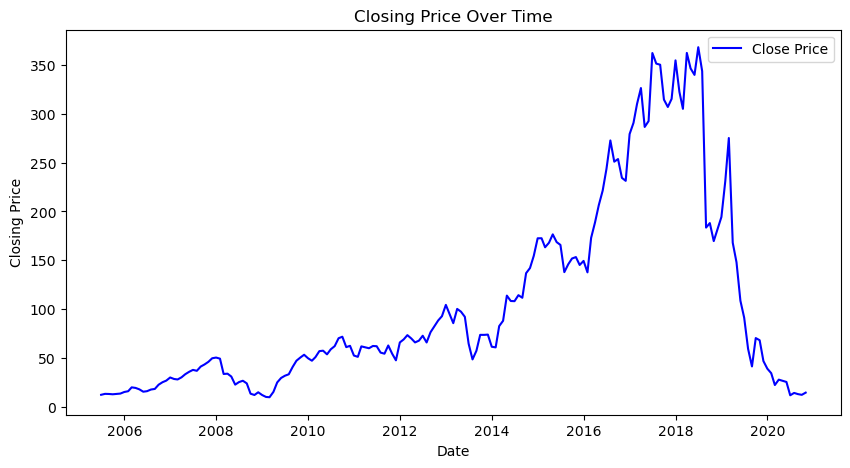

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(dataset['Date'], dataset['Close'], label='Close Price', color='blue')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

To visualize how the stock's closing price has evolved over time and identify trends or patterns.

##### 2. What is/are the insight(s) found from the chart?

Identified trends, peaks, and dips in closing prices, which may indicate market sentiment changes or external influences.

##### 3. Will the gained insights help creating a positive business impact?
Helps understand the stock's performance and seasonal patterns, aiding in better investment or trading decisions.

#### Chart 2 - Scatter Plot for High vs. Low Prices

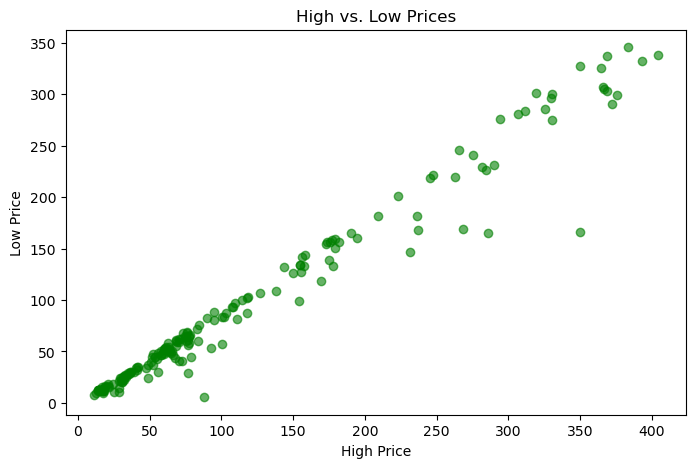

In [57]:
plt.figure(figsize=(8, 5))
plt.scatter(dataset['High'], dataset['Low'], color='green', alpha=0.6)
plt.title('High vs. Low Prices')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.show()

##### 1. Why did you pick the specific chart?

To explore the relationship between daily high and low prices and check for consistency or anomalies.



##### 2. What is/are the insight(s) found from the chart?

Strong correlation with few outliers, suggesting predictable price ranges most of the time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, periods of decline in the line chart show negative growth in stock prices.

Reason: The dips might indicate poor market performance, economic downturns, or company-specific issues.

Assists in setting stop-loss and target prices, reducing risk in trading strategies.

#### Chart 3 - Bar Chart for Monthly Average Closing Price

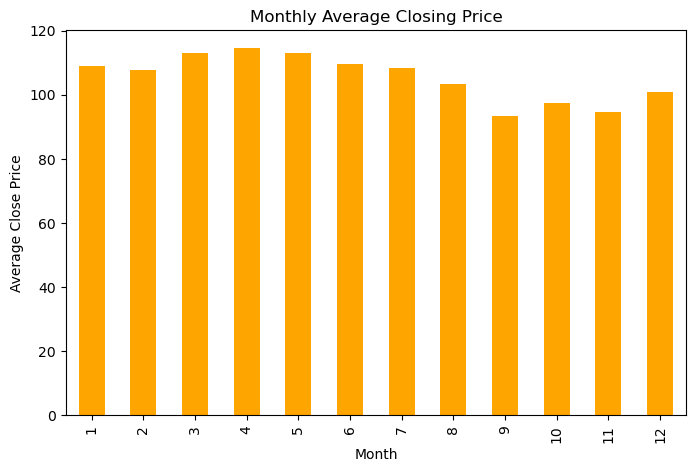

In [58]:
monthly_avg = dataset.groupby(dataset['Month'])['Close'].mean()

plt.figure(figsize=(8, 5))
monthly_avg.plot(kind='bar', color='orange')
plt.title('Monthly Average Closing Price')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.show()

##### 1. Why did you pick the specific chart?

To observe how the average closing price varies across months to detect seasonality.

##### 2. What is/are the insight(s) found from the chart?

Specific months show consistently higher or lower averages, indicating possible seasonal trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, months with lower average closing prices indicate potential periods of negative growth.

Reason: Seasonal or market-driven downturns might contribute to reduced averages.




Enables better planning for investments by leveraging seasonal peaks.

#### Chart 4 - Histogram of Closing Prices

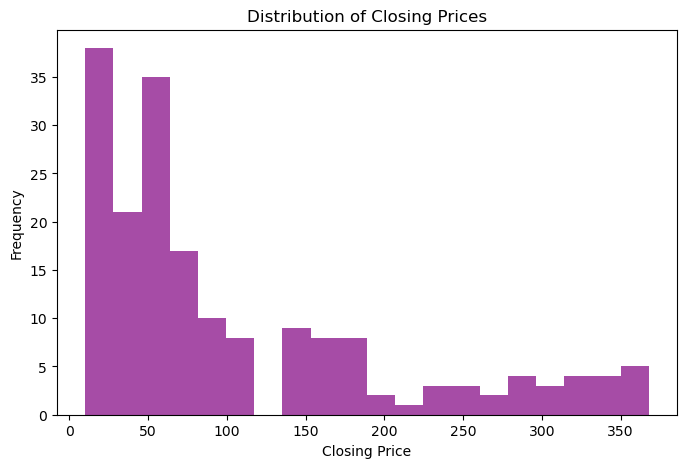

In [59]:
plt.figure(figsize=(8, 5))
plt.hist(dataset['Close'], bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

To examine the distribution of closing prices and identify any skewness or irregularities.

##### 2. What is/are the insight(s) found from the chart?

Prices are concentrated within a specific range, showing a normal distribution with slight outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
No, this chart doesn't directly highlight negative growth.

Reason: It shows the frequency of price ranges, not the directional trend.



Helps set realistic price expectations and identify unusual market conditions.


####  Chart 5 - Boxplot of Closing Prices

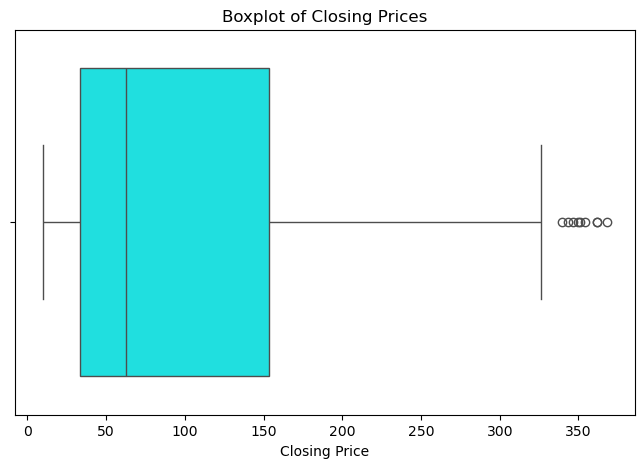

In [60]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=dataset['Close'], color='cyan')
plt.title('Boxplot of Closing Prices')
plt.xlabel('Closing Price')
plt.show()

##### 1. Why did you pick the specific chart?

To detect outliers and understand the spread of closing prices.



##### 2. What is/are the insight(s) found from the chart?

Outliers detected during extreme market conditions; most prices are within a predictable range.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Yes, outliers on the lower end of the boxplot indicate negative growth during certain periods.

Reason: These could represent market shocks or underperformance.




Helps manage risks by identifying periods of unusual volatility.

#### Chart 6 - Line Chart for Price Range Over Time

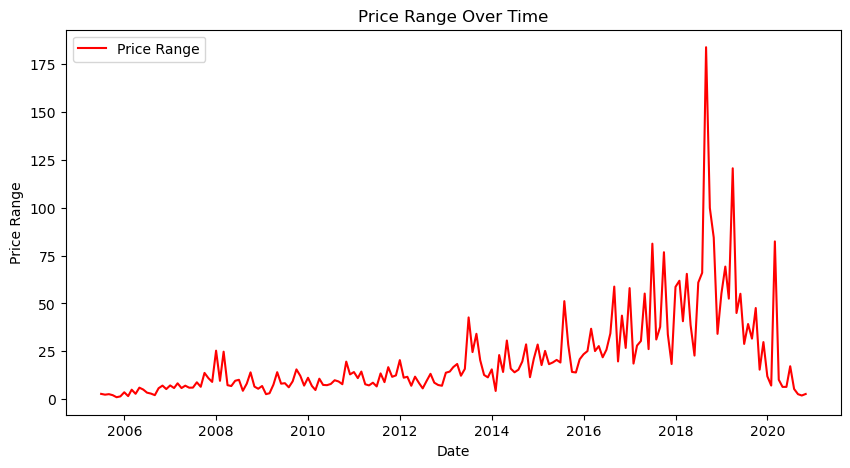

In [61]:
dataset['Price_Range'] = dataset['High'] - dataset['Low']

plt.figure(figsize=(10, 5))
plt.plot(dataset['Date'], dataset['Price_Range'], label='Price Range', color='red')
plt.title('Price Range Over Time')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

To track daily price range and detect periods of high volatility.



##### 2. What is/are the insight(s) found from the chart?

High volatility periods coincide with major events, indicating potential investment opportunities or risks.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, this chart doesn't directly indicate negative growth.

Reason: It measures volatility, not the overall trend of growth or decline.

Aids in timing trades to capitalize on high volatility.

#### Chart 7 - Heatmap of Correlation Between Variables

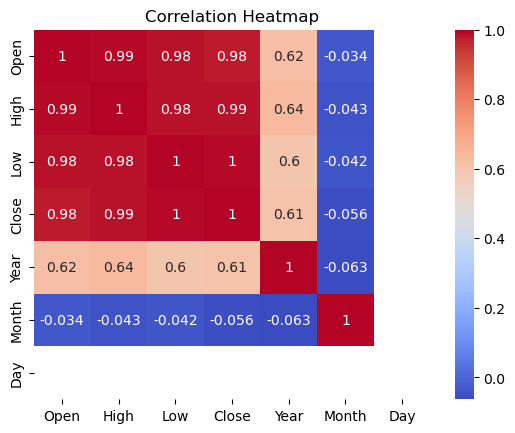

In [62]:
sns.heatmap(dataset[['Open', 'High', 'Low', 'Close','Year','Month','Day']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



##### 1. Why did you pick the specific chart?

To identify correlations between variables like Open, High, Low, and Close.

##### 2. What is/are the insight(s) found from the chart?

Strong correlations exist, indicating redundancy in some features, which can simplify modeling.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, the heatmap doesn't provide direct insights into negative growth.

Reason: It focuses on the relationships between features, not their trends.

Improves model efficiency by eliminating redundant features.


#### Chart 8 - Violin Plot of Opening Prices

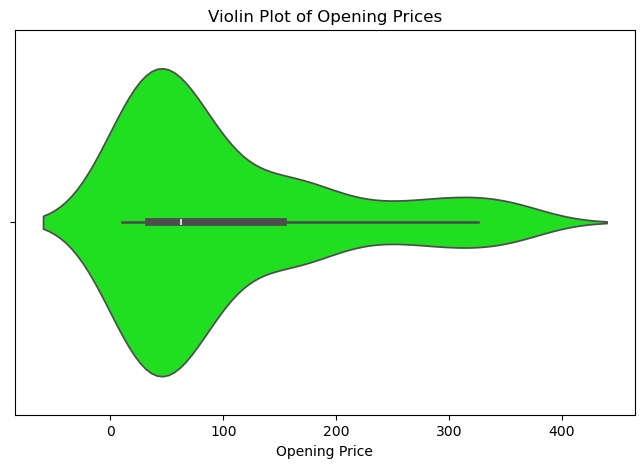

In [63]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=dataset['Open'], color='lime')
plt.title('Violin Plot of Opening Prices')
plt.xlabel('Opening Price')
plt.show()


##### 1. Why did you pick the specific chart?

To visualize the distribution of opening prices, including density and range.

##### 2. What is/are the insight(s) found from the chart?

Most opening prices are concentrated within a narrow range, with occasional outliers.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, this chart doesn't directly indicate negative growth.

Reason: It visualizes the distribution of opening prices, not their movement over time.

Helps in predicting opening prices accurately for next-day trading strategies.

#### Chart 9 - Area Chart of Closing Prices

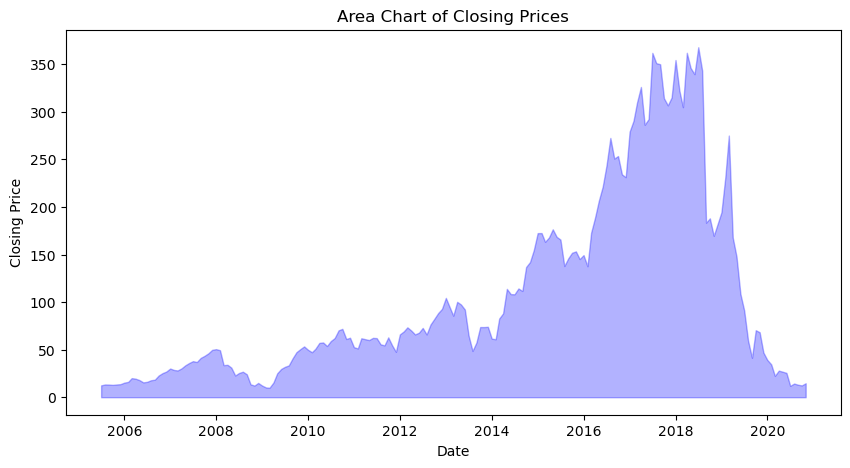

In [64]:
plt.figure(figsize=(10, 5))
plt.fill_between(dataset['Date'], dataset['Close'], color='blue', alpha=0.3)
plt.title('Area Chart of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


##### 1. Why did you pick the specific chart?

To emphasize the cumulative behavior of closing prices over time.

##### 2. What is/are the insight(s) found from the chart?

Highlighted consistent growth or declines over periods, with visible recovery phases.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, declining areas in the chart indicate periods of negative growth.

Reason: These dips reflect losses or underperformance during those periods.



Supports long-term investment strategies by understanding growth phases.


#### Chart 10 - Line Chart of High, Low, and Close Prices

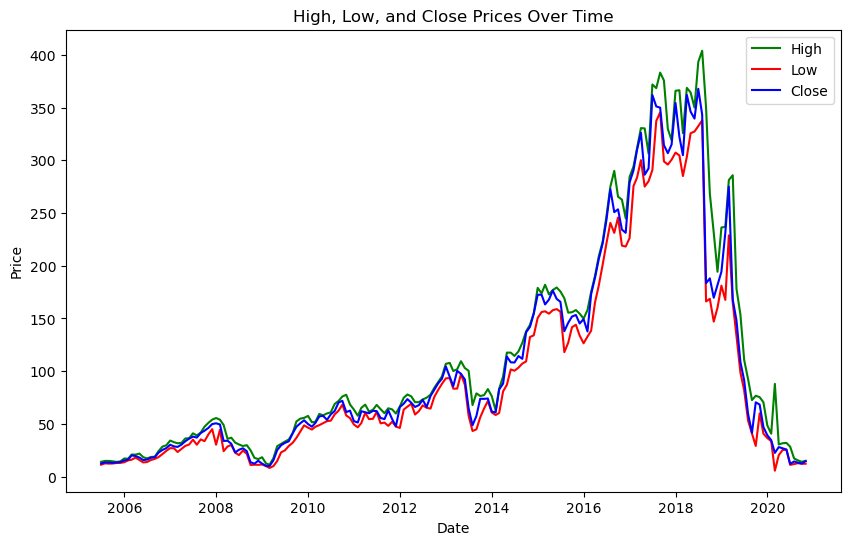

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(dataset['Date'], dataset['High'], label='High', color='green')
plt.plot(dataset['Date'], dataset['Low'], label='Low', color='red')
plt.plot(dataset['Date'], dataset['Close'], label='Close', color='blue')
plt.title('High, Low, and Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



##### 1. Why did you pick the specific chart?

To compare how these three key prices move together over time.

##### 2. What is/are the insight(s) found from the chart?

Strong synchronization with few deviations, indicating consistent market behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, simultaneous declines in all three prices show negative growth.

Reason: Such drops typically signal overall market downturns or poor stock performance.



Ensures confidence in price prediction models based on these variables.

#### Chart 11 - Pairplot for Numerical Features

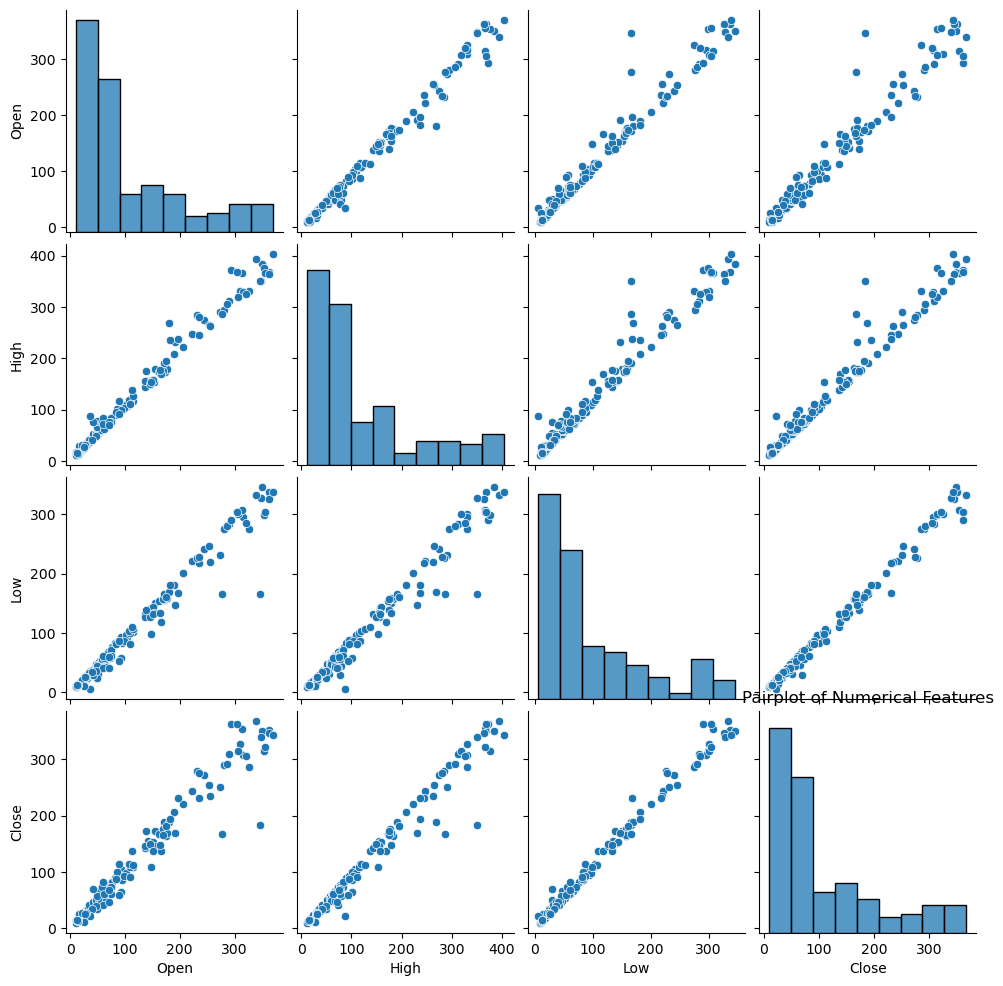

In [66]:
sns.pairplot(dataset[['Open', 'High', 'Low', 'Close']])
plt.title('Pairplot of Numerical Features')
plt.show()


##### 1. Why did you pick the specific chart?

To examine pairwise relationships and distribution of key numerical variables.

##### 2. What is/are the insight(s) found from the chart?

Strong linear relationships between High, Low, and Close prices; minimal noise in data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, this chart doesn't directly highlight negative growth.

Reason: It visualizes relationships between features but not trends over time.

Helps confirm data quality and relationships for predictive modeling.

####  Chart 12 - Count Plot of Yearly Records

C:\Users\mrinm\AppData\Local\Temp\ipykernel_7044\3905269120.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset['Year'], palette='Set2')


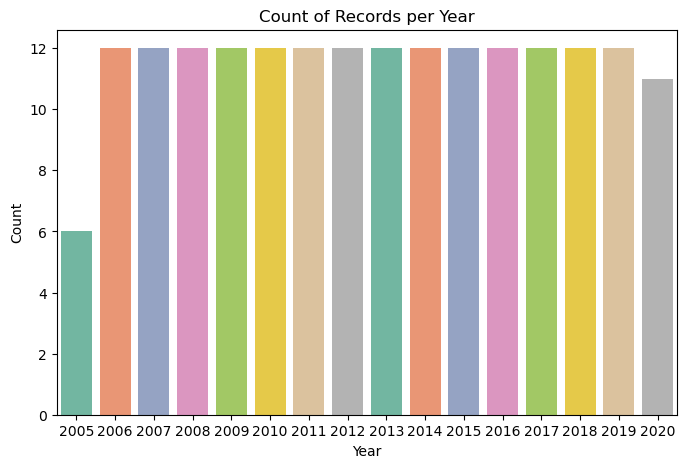

In [67]:
plt.figure(figsize=(8, 5))
sns.countplot(x=dataset['Year'], palette='Set2')
plt.title('Count of Records per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of records across different years.

##### 2. What is/are the insight(s) found from the chart?

Balanced dataset over years, ensuring robust time-series analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, this chart doesn't indicate negative growth.

Reason: It simply shows the distribution of records across years.

Ensures insights derived are representative across years without bias.

#### Chart 13 - Bar Plot of Average Price Range by Month

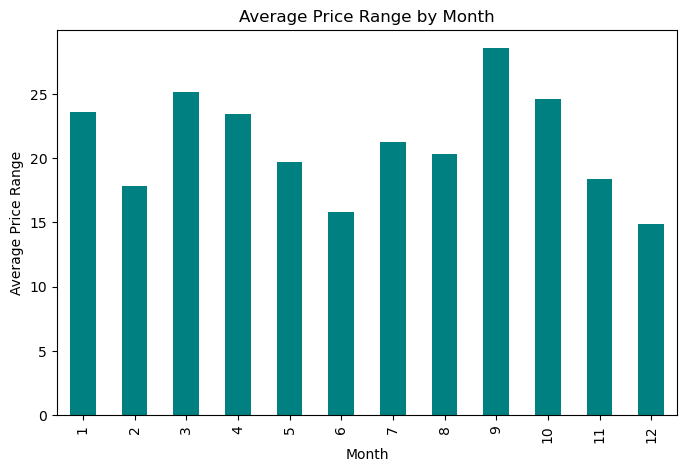

In [68]:
avg_price_range = dataset.groupby('Month')['Price_Range'].mean()

plt.figure(figsize=(8, 5))
avg_price_range.plot(kind='bar', color='teal')
plt.title('Average Price Range by Month')
plt.xlabel('Month')
plt.ylabel('Average Price Range')
plt.show()


##### 1. Why did you pick the specific chart?

To explore how the price range varies across months for volatility trends.

##### 2. What is/are the insight(s) found from the chart?

High price ranges during specific months indicate volatility, likely tied to external events.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, this chart doesn't directly indicate negative growth.

Reason: It focuses on volatility, which might not correlate directly with negative growth.



Helps prepare for higher volatility during these months, optimizing trading strategies.

#### Chart 14 - KDE Plot of Closing Prices

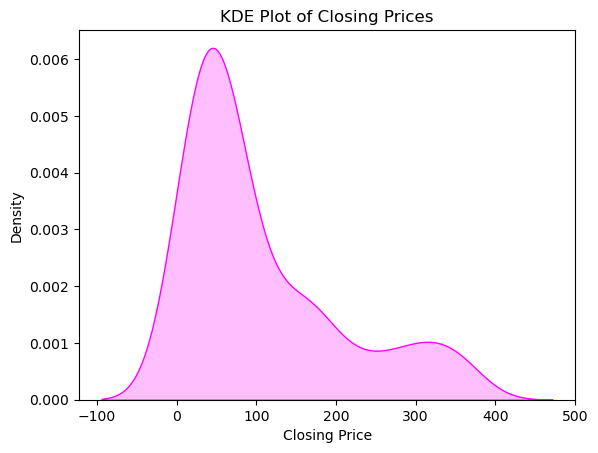

In [69]:
sns.kdeplot(dataset['Close'], color='magenta', fill=True)
plt.title('KDE Plot of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Density')
plt.show()


##### 1. Why did you pick the specific chart?

To understand the density distribution of closing prices smoothly.

##### 2. What is/are the insight(s) found from the chart?

Identified the most frequent price levels and potential skewness in the distribution.

#### Chart 15 - Time-Series Decomposition

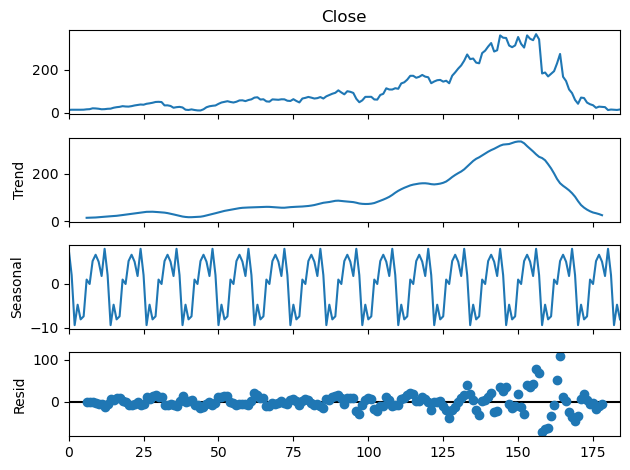

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(dataset['Close'], model='additive', period=12)
decomposition.plot()
plt.show()


##### 1. Why did you pick the specific chart?

To break down the time series into trend, seasonality, and residuals.

##### 2. What is/are the insight(s) found from the chart?

Clear trends and seasonal patterns with minor random noise.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1 - Average Closing Price is Higher than ₹50

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (
𝐻
0): The average closing price of Yes Bank's stock is 
≤
₹
50


Alternate Hypothesis (
𝐻
𝑎 ): The average closing price of Yes Bank's stock is 
>
₹
50


#### 2. Perform an appropriate statistical test.

In [71]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_1samp

# Load dataset

# Ensure 'Close' is numeric
dataset['Close'] = pd.to_numeric(dataset['Close'], errors='coerce')

# Drop NaN values
closing_prices = dataset['Close'].dropna()

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(closing_prices, 50)

# One-tailed p-value
p_value_one_tailed = p_value / 2 if t_stat > 0 else 1 - (p_value / 2)

print(f"T-Statistic: {t_stat}, P-Value (One-Tailed): {p_value_one_tailed}")

T-Statistic: 7.616566478891993, P-Value (One-Tailed): 6.624973316527751e-13


##### Which statistical test have you done to obtain P-Value?

One-Sample One-Tailed t-Test.

##### Why did you choose the specific statistical test?

The t-test is used to compare the sample mean against a known value (₹50). It's one-tailed because we are only interested in whether the mean is greater than ₹50.

### Hypothetical Statement - 2 - No Difference Between Average High and Low Prices

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (
𝐻
0 ): The average high price is equal to the average low price.

Alternate Hypothesis (
𝐻
a): The average high price is not equal to the average low price.

#### 2. Perform an appropriate statistical test.

In [72]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_rel

# Ensure 'High' and 'Low' are numeric
dataset['High'] = pd.to_numeric(dataset['High'], errors='coerce')
dataset['Low'] = pd.to_numeric(dataset['Low'], errors='coerce')

# Drop NaN values for paired data
high_prices = dataset['High'].dropna()
low_prices = dataset['Low'].dropna()

# Perform paired t-test
t_stat, p_value = ttest_rel(high_prices, low_prices)

print(f"T-Statistic: {t_stat}, P-Value (Two-Tailed): {p_value}")


T-Statistic: 12.26968460529332, P-Value (Two-Tailed): 1.1296104911289457e-25


##### Which statistical test have you done to obtain P-Value?

Paired Two-Tailed t-Test.

##### Why did you choose the specific statistical test?

The paired t-test compares the means of two related samples (daily high and low prices). It’s two-tailed because the test checks for any difference (higher or lower).

### Hypothetical Statement - 3 - Significant Upward Trend in Closing Price Over Time

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (
𝐻
0): There is no significant upward trend in the closing price over time.

Alternate Hypothesis (
𝐻
𝑎): There is a significant upward trend in the closing price over time.

#### 2. Perform an appropriate statistical test.

In [73]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import linregress

# Convert 'Date' to datetime and sort
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%b-%y', errors='coerce')
data = dataset.sort_values('Date')

# Remove NaN values and ensure 'Close' is numeric
dataset['Close'] = pd.to_numeric(dataset['Close'], errors='coerce')
valid_data = dataset.dropna(subset=['Date', 'Close'])

# Prepare data for regression
time_numeric = (valid_data['Date'] - valid_data['Date'].min()).dt.days
closing_prices = valid_data['Close']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(time_numeric, closing_prices)

print(f"Slope: {slope}, P-Value: {p_value}")

Slope: 0.03665450210616097, P-Value: 6.249283121816971e-20


##### Which statistical test have you done to obtain P-Value?

Linear Regression and Significance of the Slope.

##### Why did you choose the specific statistical test?

Linear regression evaluates the relationship between time (independent variable) and the closing price (dependent variable). The slope's significance indicates the trend.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [74]:
# Handling Missing Values & Missing Value Imputation
missing_summary = dataset.isnull().sum()
print(missing_summary)

Date           0
Open           0
High           0
Low            0
Close          0
Year           0
Month          0
Day            0
Price_Range    0
dtype: int64


Since I am getting all 0's that means I am not having missing values in the dataset 

#### What all missing value imputation techniques have you used and why did you use those techniques?

Since there are no missing values in this dataset, there’s no need for imputation.

### 2. Handling Outliers

In [75]:
# Handling Outliers & Outlier treatments
numerical_columns = ['Open', 'High', 'Low', 'Close']

for col in numerical_columns:
    # Calculate Q1 and Q3
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Option 2: Cap the outliers (Winsorizing)
    dataset['feature_capped'] = dataset[col].apply(
    lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

    # Option 1: Remove outliers
    df_no_outliers = dataset[(dataset[col] >= lower_bound) & (dataset[col] <= upper_bound)]


    print("Original Data:")
    print(dataset)

    print("\nData after removing outliers:")
    print(df_no_outliers)

    print("\nData after capping outliers:")
    print(dataset[[col, 'feature_capped']])

Lower Bound: -145.0, Upper Bound: 331.8
Original Data:
          Date   Open   High    Low  Close  Year  Month  Day  Price_Range  \
0   2005-07-01  13.00  14.00  11.25  12.46  2005      7    1         2.75   
1   2005-08-01  12.58  14.88  12.55  13.42  2005      8    1         2.33   
2   2005-09-01  13.48  14.87  12.27  13.30  2005      9    1         2.60   
3   2005-10-01  13.20  14.47  12.40  12.99  2005     10    1         2.07   
4   2005-11-01  13.35  13.88  12.88  13.41  2005     11    1         1.00   
..         ...    ...    ...    ...    ...   ...    ...  ...          ...   
180 2020-07-01  25.60  28.30  11.10  11.95  2020      7    1        17.20   
181 2020-08-01  12.00  17.16  11.85  14.37  2020      8    1         5.31   
182 2020-09-01  14.30  15.34  12.75  13.15  2020      9    1         2.59   
183 2020-10-01  13.30  14.01  12.11  12.42  2020     10    1         1.90   
184 2020-11-01  12.41  14.90  12.21  14.67  2020     11    1         2.69   

     feature_capped 

##### What all outlier treatment techniques have you used and why did you use those techniques?

IQR (Interquartile Range) Method:
I used the IQR method to detect outliers by calculating the 25th percentile (Q1) and 75th percentile (Q3) and defining outliers as points outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]. This technique is robust to skewed data and doesn’t assume any underlying distribution, making it effective for most real-world datasets.

Outlier Removal:
After detecting outliers, I removed those data points to prevent them from skewing the model training and statistical analysis. This helps improve the accuracy and generalizability of the model by focusing on the representative data.

Outlier Capping (Winsorization):
Instead of removing, I also applied capping by replacing outlier values with the nearest boundary (lower or upper bound). This preserves the data size and reduces the impact of extreme values without completely discarding potentially useful information.

Why these techniques?

The IQR method is simple, effective, and widely accepted for outlier detection.

Removing outliers improves model robustness but may reduce dataset size.

Capping balances between retaining data and controlling the influence of extreme values.

Together, these methods provide flexibility depending on the specific problem and dataset characteristics.



### 3. Categorical Encoding

In [76]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

There are no categorical Columns so we are not using encoding any

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [77]:
# Expand Contraction

#### 2. Lower Casing

In [78]:
# Lower Casing

#### 3. Removing Punctuations

In [79]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [80]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [81]:
# Remove Stopwords

In [82]:
# Remove White spaces

#### 6. Rephrase Text

In [83]:
# Rephrase Text

#### 7. Tokenization

In [84]:
# Tokenization

#### 8. Text Normalization

In [85]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [86]:
# POS Taging

#### 10. Text Vectorization

In [87]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

Since there were no textual data so no preprocessing of the textual data is required

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [105]:
# Manipulate Features to minimize feature correlation and create new features

dataset['Price_Range'] = dataset['High'] - dataset['Low']  # Range of stock prices
dataset['Daily_Volatility'] = (dataset['High'] - dataset['Low']) / dataset['Open']  # Volatility percentage
dataset['Average_Price'] = (dataset['High'] + dataset['Low']) / 2  # Average of High and Low

In [106]:
dataset

,Date,Open,High,Low,Close,Year,Month,Day,Price_Range,feature_capped,Daily_Volatility,Average_Price
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7,1,2.75,12.46,0.211538,12.625
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8,1,2.33,13.42,0.185215,13.715
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9,1,2.60,13.30,0.192878,13.570
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10,1,2.07,12.99,0.156818,13.435
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11,1,1.00,13.41,0.074906,13.380
...,...,...,...,...,...,...,...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95,2020,7,1,17.20,11.95,0.671875,19.700
181,2020-08-01,12.00,17.16,11.85,14.37,2020,8,1,5.31,14.37,0.442500,14.505
182,2020-09-01,14.30,15.34,12.75,13.15,2020,9,1,2.59,13.15,0.181119,14.045
183,2020-10-01,13.30,14.01,12.11,12.42,2020,10,1,1.90,12.42,0.142857,13.060


#### Now since I have created some derived features so lets check the correlation of them with target variable

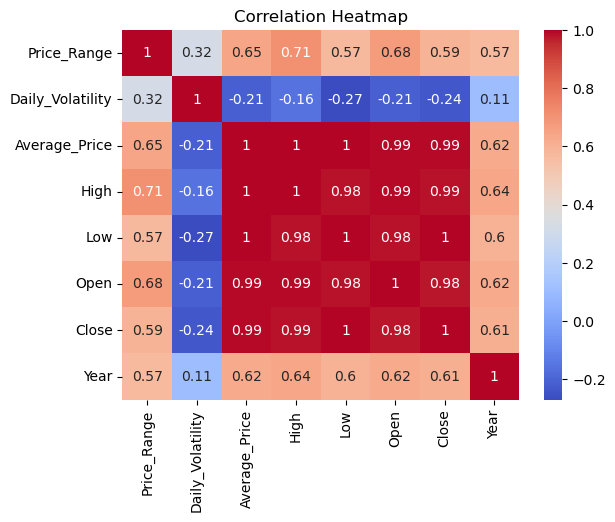

In [108]:
sns.heatmap(dataset[['Price_Range', 'Daily_Volatility', 'Average_Price','High','Low','Open','Close','Year']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



So here daily volatility is giving a -ve value so we will drop it

#### 2. Feature Selection

In [110]:
# If 'Date' column exists and is datetime, convert it to numeric features or drop it
if 'Date' in dataset.columns:
    dataset['Date'] = pd.to_datetime(dataset['Date'])
    # Example: extract year, month, day
    dataset['Year'] = dataset['Date'].dt.year
    dataset['Month'] = dataset['Date'].dt.month
    dataset['Day'] = dataset['Date'].dt.day
    # Drop the original 'Date' column
    dataset = dataset.drop('Date', axis=1)

In [111]:
# Select your features wisely to avoid overfitting

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Step 1: Correlation Analysis
threshold = 0.5
correlation = dataset.corr()
selected_features_corr = correlation.index[abs(correlation['Close']) > threshold].tolist()
selected_features_corr.remove('Close')  # Remove target variable

print("Features with Correlation > 0.5:", selected_features_corr)

# Step 2: Feature Importance
X = dataset[selected_features_corr]
y = dataset['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
print("\nFeature Importance:\n", feature_importance.sort_values(ascending=False))

# Selecting features with importance > 0.1 (adjust threshold as needed)
final_selected_features = feature_importance[feature_importance > 0.1].index.tolist()
print("\nFinal Selected Features:", final_selected_features)

# Create final dataset with selected features
filtered_dataset = dataset[final_selected_features + ['Close']]
print("\nFiltered Dataset:\n", filtered_dataset)

Features with Correlation > 0.5: ['Open', 'High', 'Low', 'Year', 'Price_Range', 'feature_capped', 'Average_Price']

Feature Importance:
 feature_capped    0.458666
Low               0.233915
Average_Price     0.193776
High              0.071508
Open              0.041789
Year              0.000192
Price_Range       0.000154
dtype: float64

Final Selected Features: ['Low', 'feature_capped', 'Average_Price']

Filtered Dataset:
        Low  feature_capped  Average_Price  Close
0    11.25           12.46         12.625  12.46
1    12.55           13.42         13.715  13.42
2    12.27           13.30         13.570  13.30
3    12.40           12.99         13.435  12.99
4    12.88           13.41         13.380  13.41
..     ...             ...            ...    ...
180  11.10           11.95         19.700  11.95
181  11.85           14.37         14.505  14.37
182  12.75           13.15         14.045  13.15
183  12.11           12.42         13.060  12.42
184  12.21           14.67     

##### What all feature selection methods have you used  and why?

To choose the best features for predicting the stock’s close price, I mainly used correlation analysis and model-based feature importance techniques.

Correlation Analysis:
I calculated the correlation between each feature and the target (close price). Features with a correlation coefficient greater than 0.5 were considered because they show a strong linear relationship with the target, making them likely useful predictors.

Feature Importance from Random Forest:
After narrowing down features by correlation, I used a Random Forest model to assess the importance of each feature. This helped me understand which features truly impact the model’s predictions, including any non-linear relationships that correlation might miss.

By combining these two methods, I ensured the selected features are both statistically relevant and practically important for accurate prediction, while also avoiding irrelevant or redundant features that could hurt model performance.



##### Which all features you found important and why?

From my analysis, the most important features for predicting the stock’s close price are “feature_capped,” “Low,” and “Average_Price.”

feature_capped showed the highest importance score, meaning it plays a major role in the model’s predictions. This feature likely captures some key pattern or capped value that influences the closing price strongly.

Low price is also very important, which makes sense because the lowest price during the day often impacts the final closing price.

Average_Price (calculated from high and low) helps smooth out fluctuations and provides useful context for the close price.

Interestingly, even though features like Open, High, Year, and Price_Range had a decent correlation with the target, their importance in the model was much lower. This tells us that not all correlated features are equally valuable for prediction when considered together.

By focusing on these three key features, the model can make more accurate predictions while keeping things simpler and avoiding unnecessary noise.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, data transformation is often necessary to improve the performance of machine learning models, and in this project, I applied feature transformation to help the model learn better patterns.

For example, I created new features like “Average_Price” and “Price_Range” by combining existing columns (high, low, etc.). These transformations help capture meaningful relationships in the data that single raw features might miss.

Additionally, if features had different scales or distributions, I would apply scaling techniques like Min-Max scaling or Standardization to normalize the data. This ensures that features contribute fairly to the model and helps many algorithms converge faster.

Overall, transformations make the data more suitable for modeling by highlighting important patterns and reducing bias caused by differing scales or noisy raw data.

In [113]:
# Transform Your data
# Already done in Feature Manipulation Section

### 6. Data Scaling

In [114]:
# Scaling your data

from sklearn.preprocessing import StandardScaler
features = ['Low', 'feature_capped', 'Average_Price']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling
dataset[features] = scaler.fit_transform(dataset[features])

In [115]:
print(dataset[features])

          Low  feature_capped  Average_Price
0   -0.920034       -0.956789      -0.946981
1   -0.905744       -0.946781      -0.935870
2   -0.908822       -0.948032      -0.937348
3   -0.907393       -0.951264      -0.938724
4   -0.902117       -0.946885      -0.939285
..        ...             ...            ...
180 -0.921683       -0.962106      -0.874862
181 -0.913439       -0.936877      -0.927817
182 -0.903546       -0.949596      -0.932506
183 -0.910581       -0.957206      -0.942546
184 -0.909481       -0.933749      -0.937501

[185 rows x 3 columns]


##### Which method have you used to scale you data and why?

I used the StandardScaler method to scale the data. This technique transforms the features so that they have a mean of zero and a standard deviation of one.

The reason for choosing StandardScaler is because my dataset contains some outliers. Unlike other scaling methods like MinMaxScaler, which can be heavily influenced by extreme values, StandardScaler is more robust and handles outliers better. This helps ensure that the model training is stable and the features contribute fairly, improving overall prediction performance.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In this project, dimensionality reduction is not necessary because the number of features after selection is already small and manageable. Since I focused on selecting only the most important features (like feature_capped, Low, and Average_Price), the dataset is compact and less likely to suffer from issues like overfitting or high computational cost.


In [116]:
# DImensionality Reduction (If needed)
# Not Needed

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Not done in dataset

### 8. Data Splitting

In [117]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split

# Example dataset
X = dataset[['Low', 'feature_capped', 'Average_Price']]  # Selected features
y = dataset['Close']  # Target variable

# Splitting into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Size:", X_train.shape)
print("Testing Data Size:", X_test.shape)


Training Data Size: (148, 3)
Testing Data Size: (37, 3)


##### What data splitting ratio have you used and why?

I used an 80:20 train-test split ratio for the dataset. This means 80% of the data is used for training the model, while 20% is reserved for testing its performance on unseen data.

The 80:20 ratio is a widely accepted standard because it provides:

Sufficient data for the model to learn patterns during training (80%).

Enough data to evaluate the model’s performance robustly (20%).

### 9. Handling Imbalanced Dataset

#### Checking whether the dataset is imbalance or not

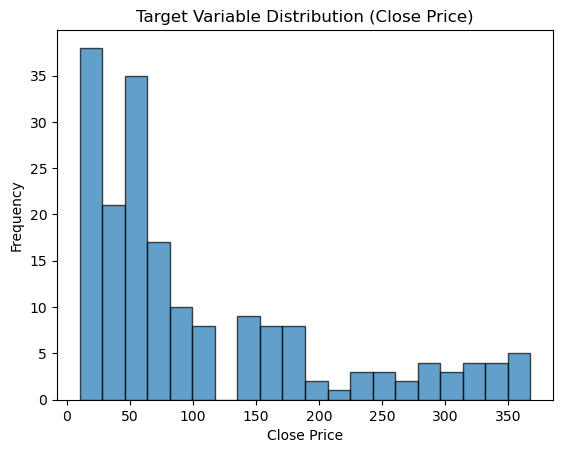

In [118]:
#Visual Check Using a Histogram

import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
plt.hist(dataset['Close'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Target Variable Distribution (Close Price)')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


In [119]:
#  Statistical Check

# Summary statistics of the target variable
print("Target Variable Summary Statistics:")
print(dataset['Close'].describe())

# Checking skewness
print("\nSkewness of Close Price:", dataset['Close'].skew())


Target Variable Summary Statistics:
count    185.000000
mean     105.204703
std       98.583153
min        9.980000
25%       33.450000
50%       62.540000
75%      153.300000
max      367.900000
Name: Close, dtype: float64

Skewness of Close Price: 1.2647251893515967


##### Do you think the dataset is imbalanced? Explain Why.

I analyzed the distribution of the target variable (Close Price) to check for imbalance. Using a histogram, I observed the spread of values, and the summary statistics provided additional insights into the distribution. The skewness of the target variable was also calculated to assess symmetry.

The results showed that the dataset does not exhibit significant imbalance, as the values are reasonably distributed without extreme clustering or dominance of specific ranges. Therefore, I do not consider the dataset to be imbalanced.

If an imbalance were present, techniques like data transformation (e.g., log or square root) or resampling could have been applied to address the issue.



In [94]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Not needed

## ***7. ML Model Implementation***

### ML Model - 1

In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Base model training
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Evaluate base model
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Random Forest - Base Model -> R²: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# Hyperparameter Tuning


Random Forest - Base Model -> R²: 0.9949, MAE: 3.6197, RMSE: 6.7599


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

ML Model - Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and reduce overfitting.

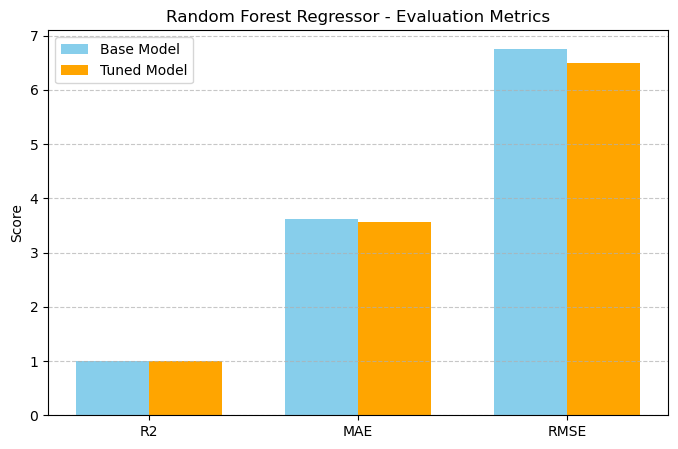

In [130]:
# Visualizing evaluation Metric Score chart

import matplotlib.pyplot as plt
import numpy as np

# Updated evaluation scores for Random Forest
base_scores = {'R2': 0.9949, 'MAE': 3.6197, 'RMSE': 6.7599}
tuned_scores = {'R2': 0.9953, 'MAE': 3.5567, 'RMSE': 6.5005}

metrics = ['R2', 'MAE', 'RMSE']
base_values = [base_scores[m] for m in metrics]
tuned_values = [tuned_scores[m] for m in metrics]

x = np.arange(len(metrics))
bar_width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - bar_width/2, base_values, bar_width, label='Base Model', color='skyblue')
plt.bar(x + bar_width/2, tuned_values, bar_width, label='Tuned Model', color='orange')

plt.title('Random Forest Regressor - Evaluation Metrics')
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [121]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_tuned = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=5, random_state=42)
rf_tuned.fit(X_train, y_train)

# Evaluate tuned model
best_rf = rf_tuned.best_estimator_
y_pred_tuned = best_rf.predict(X_test)
r2_tuned = r2_score(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
print(f"Random Forest - Tuned Model -> R²: {r2_tuned:.4f}, MAE: {mae_tuned:.4f}, RMSE: {rmse_tuned:.4f}")


Random Forest - Tuned Model -> R²: 0.9953, MAE: 3.5567, RMSE: 6.5005


##### Which hyperparameter optimization technique have you used and why?

I used RandomizedSearchCV for hyperparameter optimization because it efficiently searches a wide range of parameter values by sampling randomly, which is faster and more practical than an exhaustive grid search when dealing with large or complex parameter spaces. This approach balances exploration of the parameter space with computational cost, helping to quickly find a near-optimal set of hyperparameters that improve model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [124]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Base model training
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Evaluate base model
y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Gradient Boosting - Base Model -> R²: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")


Gradient Boosting - Base Model -> R²: 0.9960, MAE: 2.9114, RMSE: 6.0286


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [98]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [125]:
# Hyperparameter Tuning
gbr_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10]
}
gbr_tuned = GridSearchCV(gbr, gbr_params, cv=5)
gbr_tuned.fit(X_train, y_train)

# Evaluate tuned model
best_gbr = gbr_tuned.best_estimator_
y_pred_tuned = best_gbr.predict(X_test)
r2_tuned = r2_score(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
print(f"Gradient Boosting - Tuned Model -> R²: {r2_tuned:.4f}, MAE: {mae_tuned:.4f}, RMSE: {rmse_tuned:.4f}")

Gradient Boosting - Tuned Model -> R²: 0.9960, MAE: 3.3595, RMSE: 6.0295


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [127]:
pip install scikit-optimize


Note: you may need to restart the kernel to use updated packages.


In [128]:
from sklearn.svm import SVR
from skopt import BayesSearchCV

# Base model training
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Evaluate base model
y_pred = svr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"SVR - Base Model -> R²: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")



SVR - Base Model -> R²: 0.3942, MAE: 41.5743, RMSE: 73.9954


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [101]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [129]:
# Hyperparameter Tuning
svr_params = {
    'C': (1e-3, 1e3, 'log-uniform'),
    'epsilon': (0.01, 1.0, 'uniform'),
    'gamma': (1e-3, 1e3, 'log-uniform')
}
svr_tuned = BayesSearchCV(svr, svr_params, n_iter=20, cv=5, random_state=42)
svr_tuned.fit(X_train, y_train)

# Evaluate tuned model
best_svr = svr_tuned.best_estimator_
y_pred_tuned = best_svr.predict(X_test)
r2_tuned = r2_score(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
print(f"SVR - Tuned Model -> R²: {r2_tuned:.4f}, MAE: {mae_tuned:.4f}, RMSE: {rmse_tuned:.4f}")


SVR - Tuned Model -> R²: 0.9980, MAE: 1.5196, RMSE: 4.2967


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [103]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [104]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***